In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#pd.set_option('display.max.columns', 10) 

df= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem1.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


#     ■머신러닝(50점)

## 1. 데이터 전처리
### 1-1. 데이터의 특징을 파악하시오(EDA)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
Time      1193 non-null float64
V1        1193 non-null float64
V2        1193 non-null float64
V3        1193 non-null float64
V4        1193 non-null float64
V5        1193 non-null float64
V6        1193 non-null float64
V7        1193 non-null float64
V8        1193 non-null float64
V9        1193 non-null float64
V10       1193 non-null float64
V11       1193 non-null float64
V12       1193 non-null float64
V13       1193 non-null float64
V14       1193 non-null float64
V15       1193 non-null float64
V16       1193 non-null float64
V17       1193 non-null float64
Amount    1193 non-null float64
Class     1193 non-null int64
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


- 결측치 없음. 종속변수 제외한 모든 독립변수는 수치형

In [14]:
df.describe(include='all')  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000


- 평균과 표준편차는 V1~V17 모두 비슷하지만 min,max을 값을 보면 차이가 많이난다  => Scaling을 해주는 것이 좋을듯 함.
- Amount값 또한 V1~V17과 값의 범위가 많이 차이나므로 Scaling이 필요함
- Time 값은 의미가 없다고 서술되어있으므로 독립변수 후보에서 제외

In [11]:
df['Class'].value_counts()

0    993
1    200
Name: Class, dtype: int64

- 종속변수비율이 치우쳐져있음 -> 오버샘플링 필요

### 1-2. 상관관계를 시각화하고 전처리가 필요함을 설명하시오

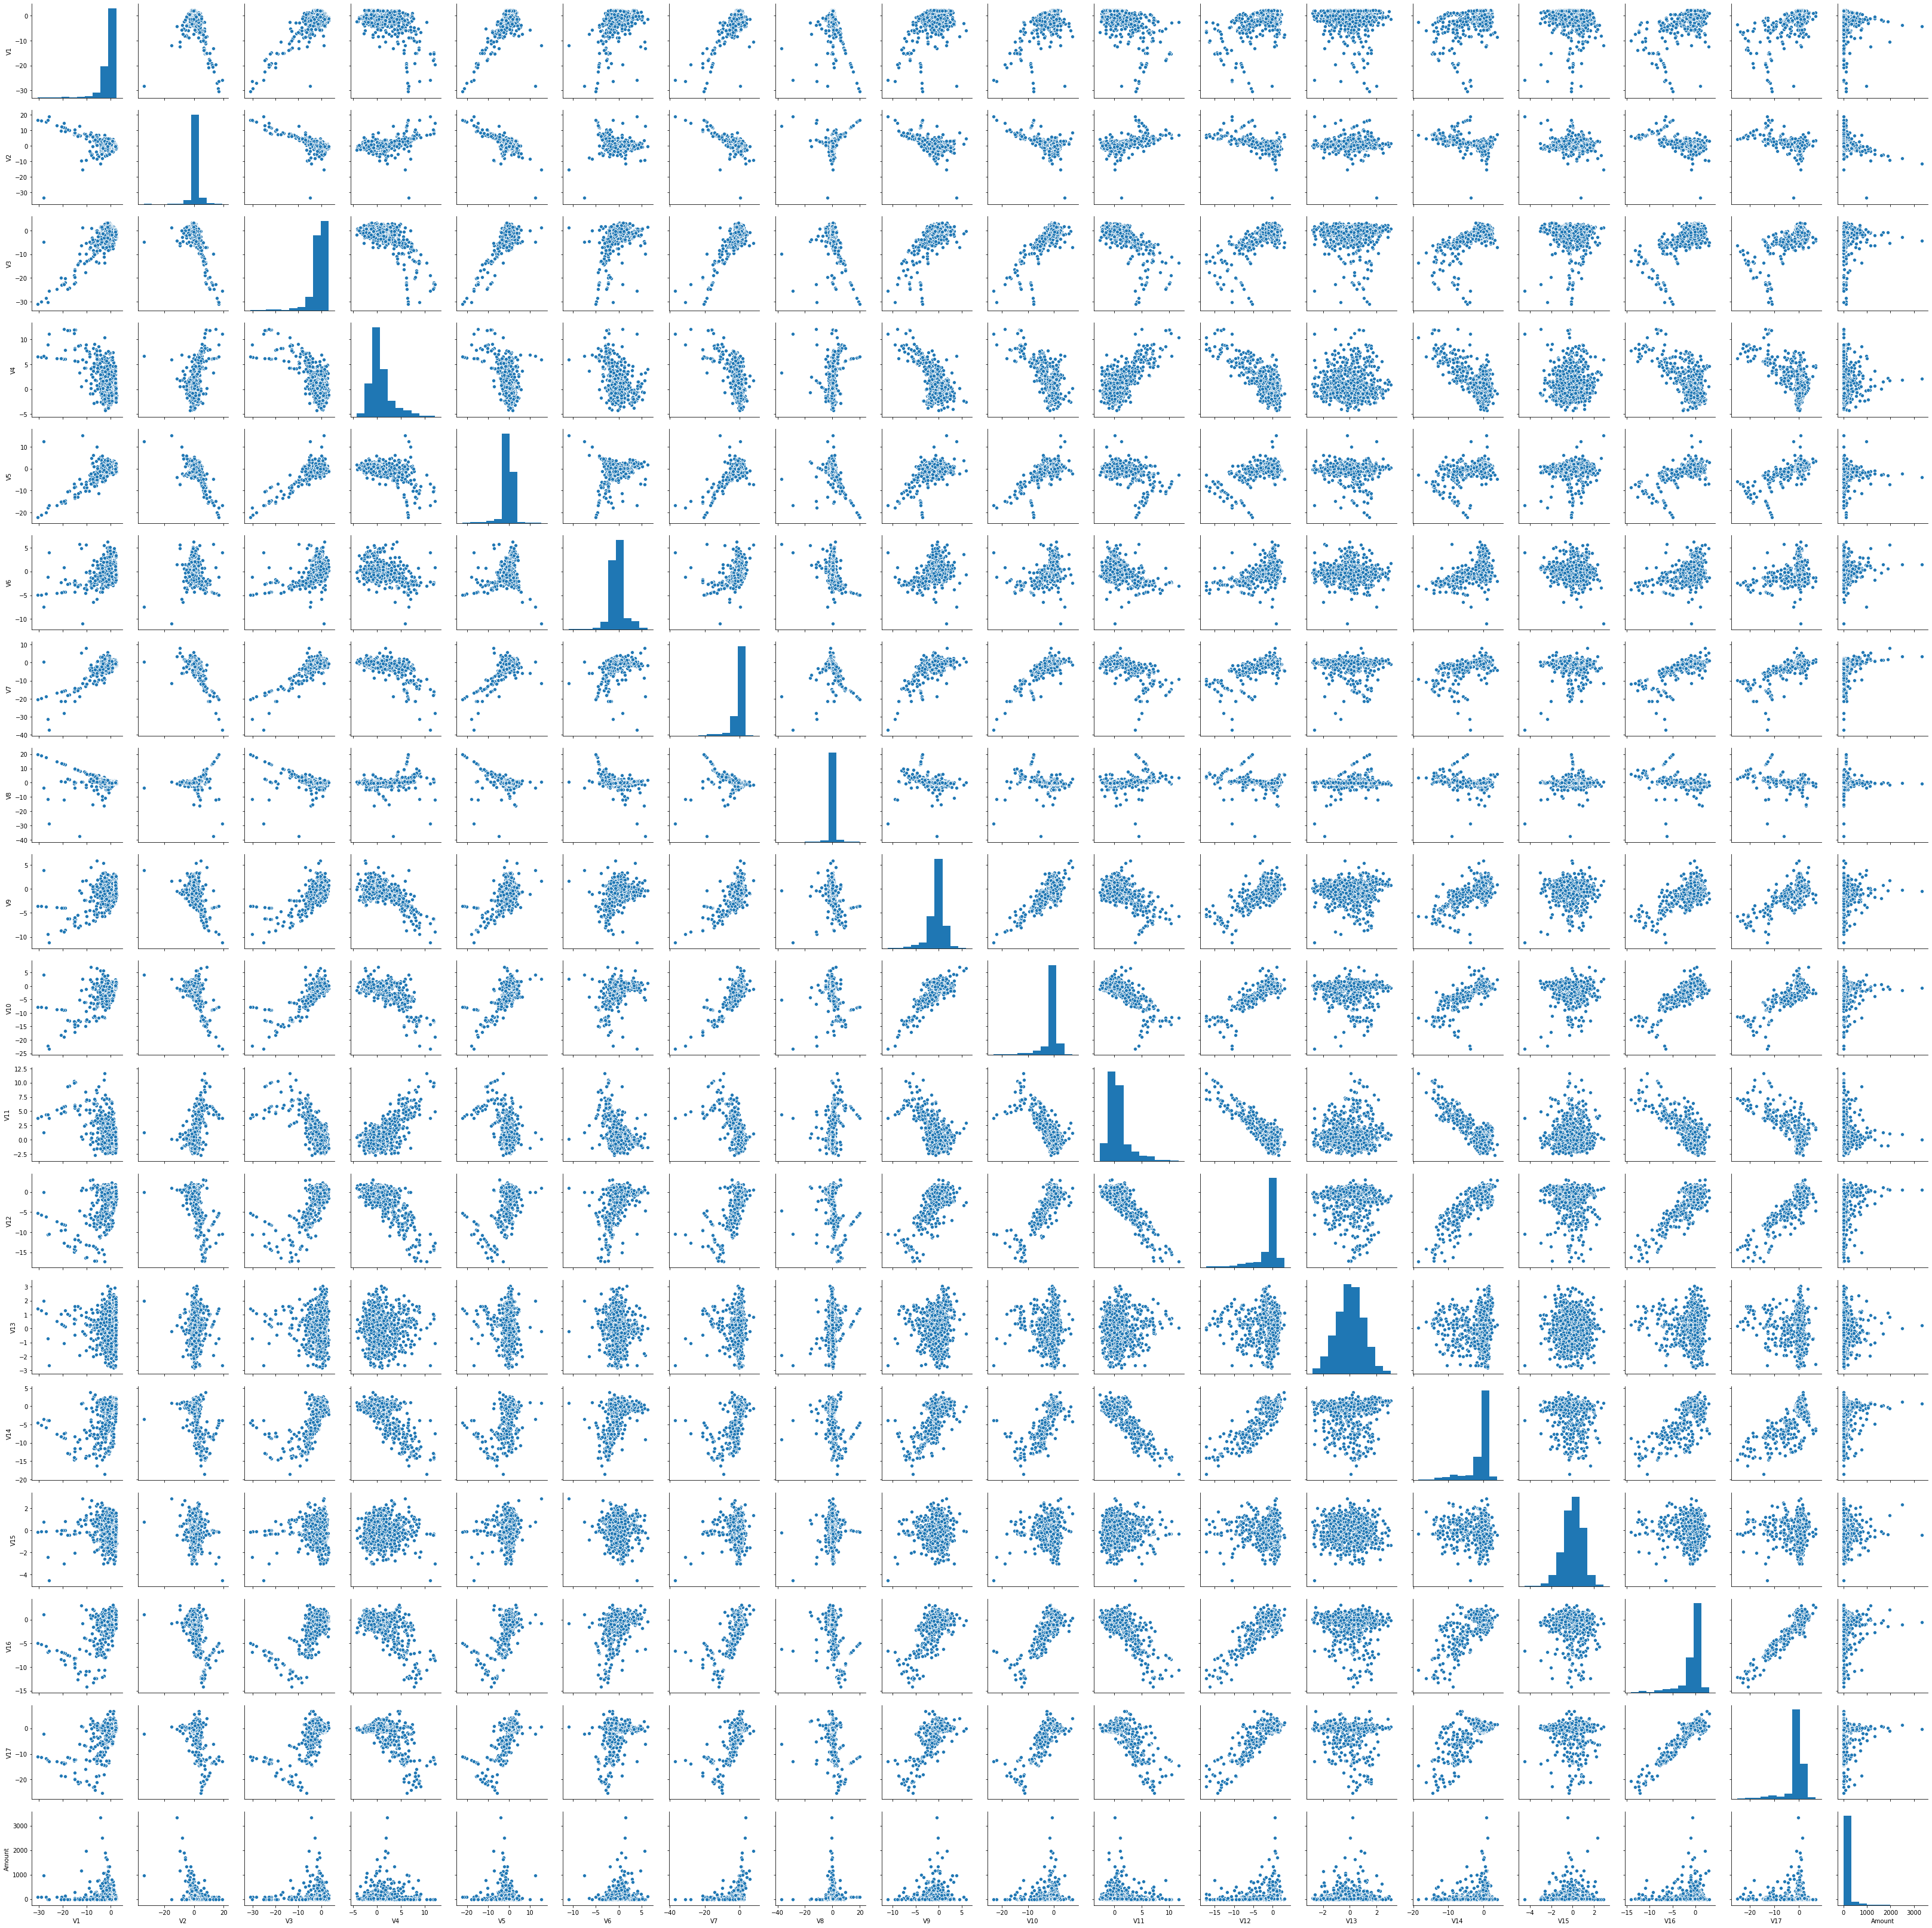

In [18]:
sns.pairplot(df.loc[:,'V1':'Amount'])

In [19]:
plt.show()

In [23]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
Time,1.000000,0.165479,-0.137628,-0.007859,-0.195626,0.219482,-0.015767,0.177791,-0.125016,0.104487,0.139923,-0.278915,0.207418,-0.060997,0.097674,-0.177245,0.152529,0.158174,0.022569,-0.127698
V1,0.165479,1.000000,-0.490949,0.747294,-0.517741,0.639808,0.301923,0.759509,-0.221486,0.515030,0.640838,-0.483213,0.557434,-0.052233,0.480791,0.028847,0.578608,0.613414,-0.126770,-0.476290
V2,-0.137628,-0.490949,1.000000,-0.662717,0.463247,-0.626978,-0.175226,-0.641787,0.166666,-0.514077,-0.635937,0.479087,-0.563784,0.018457,-0.502995,-0.083518,-0.512226,-0.526804,-0.361581,0.464393
V3,-0.007859,0.747294,-0.662717,1.000000,-0.669457,0.721634,0.366930,0.830995,-0.285488,0.640404,0.800687,-0.661869,0.734679,-0.048803,0.689142,0.061958,0.691389,0.711412,-0.060314,-0.628988
V4,-0.195626,-0.517741,0.463247,-0.669457,1.000000,-0.457217,-0.334194,-0.638917,0.163396,-0.593973,-0.686783,0.676151,-0.727734,-0.003994,-0.724656,-0.009398,-0.650353,-0.642360,0.064913,0.697202
V5,0.219482,0.639808,-0.626978,0.721634,-0.457217,1.000000,0.204118,0.743969,-0.345485,0.537404,0.670030,-0.470915,0.562521,-0.069496,0.446920,0.061771,0.624204,0.683379,-0.173083,-0.408529
V6,-0.015767,0.301923,-0.175226,0.366930,-0.334194,0.204118,1.000000,0.267301,-0.308597,0.274046,0.341079,-0.340487,0.376112,-0.038692,0.400011,-0.060829,0.332483,0.323449,0.151331,-0.353129
V7,0.177791,0.759509,-0.641787,0.830995,-0.638917,0.743969,0.267301,1.000000,-0.116658,0.645007,0.810600,-0.617405,0.713087,-0.031482,0.617465,0.042843,0.731554,0.759977,0.123627,-0.565463
V8,-0.125016,-0.221486,0.166666,-0.285488,0.163396,-0.345485,-0.308597,-0.116658,1.000000,-0.179808,-0.180986,0.211890,-0.222319,0.121770,-0.222630,0.093220,-0.267200,-0.315284,0.008459,0.144127
V9,0.104487,0.515030,-0.514077,0.640404,-0.593973,0.537404,0.274046,0.645007,-0.179808,1.000000,0.702023,-0.589535,0.652466,-0.014463,0.640872,0.042541,0.634698,0.674207,-0.017153,-0.554416


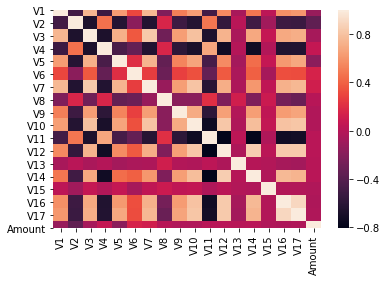

In [41]:
sns.heatmap(df.loc[:,'V1':'Amount'].corr())

In [51]:
df_corr = df.loc[:,'V1':'Amount'].corr()
df_corr
df_corr[(df_corr > 0.8) & (df_corr !=1)].count().sum() / 2


10.0

- 상관관계가 0.7을 넘는 조합이 10개나 있음. => 모든 독립변수를 사용할 필요가 없음 => 변수선택,차원축소 필요

## 2. 차원축소
### 2-1. 차원 축소 방법 2가지 이상을 비교하고 한 가지를 선택하시오

차원 축소를 하는 방법은 크게 2가지로 나눌 수 있다. <hr>먼저 첫 번째는 피쳐 선택(Feature Selection)입니다.  
  
피쳐 선택은 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하는 방법입니다. 이 방법은 선택한 피처의 해석이 용이하다는 장점이 있지만, 피쳐간의 상관관계를 고려하기 단점이 있습니다. 피쳐 선택 방법에는 전진 선택법, 후진 제거법, 단계적 선택법 등이 있습니다.  
<hr><hr>
두 번째는 피쳐 추출(Feature Extraction) 입니다.  
  
피쳐 추출은 기존 피처를 저차원의 중요 피처를 압축해서 추출하는 것입니다. 이렇게 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이되고, 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소를 추출합니다.
피쳐 추출은 피쳐간 상관관계를 고려하기 용이하다는 장점이 있지만, 추출된 변수의 해석이 어렵다는 단점이 있습니다. 피쳐 추출 방법에는 PCA, MDS, LDA, t-SNE 등이 있습니다.

<hr><hr>
저는 이 중, LDA(Linear Discriminant Analysis, 선형판별분석) 알고리즘을 선택하여 분석을 수행하고자 합니다.

### 2-2. 위에서 선택한 방법을 실제로 수행하고, 선택한 이유를 설명하시오.

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [54]:
df2 = df.copy()

LDA 수행 전, 독립변수들에 대한 Scaling을 진행합니다

In [60]:
mm_scaler = MinMaxScaler()

In [61]:
X_scale = pd.DataFrame(MinMaxScaler().fit_transform(df2.drop(columns=['Time','Class'])))
X_scale

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.961930,0.637895,0.912433,0.341970,0.578983,0.584597,0.824812,0.647869,0.656148,0.766357,0.149728,0.841885,0.396514,0.846545,0.747061,0.828935,0.774957,0.026801
1,0.859068,0.674027,0.856673,0.505364,0.577384,0.551449,0.764054,0.675465,0.490308,0.673687,0.408750,0.704624,0.375731,0.634693,0.663467,0.752141,0.700038,0.000000
2,0.870633,0.669722,0.940850,0.237538,0.587602,0.778613,0.778928,0.560778,0.699471,0.770105,0.187567,0.891818,0.472529,0.808282,0.546253,0.834065,0.781779,0.004854
3,0.836822,0.577282,0.935048,0.401201,0.627729,0.572534,0.827416,0.650021,0.636942,0.737371,0.156207,0.822487,0.592438,0.750743,0.882092,0.856807,0.807547,0.158586
4,0.907532,0.649164,0.923368,0.260315,0.653359,0.860305,0.813288,0.670202,0.617816,0.764786,0.168196,0.828321,0.495747,0.834728,0.858048,0.834083,0.766878,0.006595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,0.986601,0.627875,0.906219,0.290574,0.557174,0.566768,0.808465,0.647924,0.731516,0.756999,0.182909,0.905700,0.609740,0.811701,0.658278,0.805838,0.783204,0.010492
1189,0.993305,0.636789,0.856898,0.272964,0.601605,0.589814,0.824801,0.645990,0.687145,0.765089,0.117706,0.858305,0.524018,0.845487,0.718217,0.812124,0.768464,0.001346
1190,0.992636,0.615862,0.893606,0.217367,0.555760,0.595564,0.796557,0.649015,0.664064,0.788241,0.132449,0.832875,0.581952,0.797998,0.646921,0.884689,0.792734,0.014156
1191,0.752253,0.643374,0.882149,0.308662,0.490076,0.758455,0.769909,0.701694,0.685270,0.801647,0.076594,0.905407,0.526084,0.825278,0.366255,0.758412,0.819316,0.044968


In [72]:
lda = LDA()

In [73]:
lda_res = pd.DataFrame(lda.fit_transform(X_scale, df2['Class']))
lda_res

,0
0,-0.659578
1,2.002745
2,-0.455238
3,0.673833
4,-0.881047
...,...
1188,-0.736342
1189,-0.962761
1190,-0.855397
1191,-1.034318


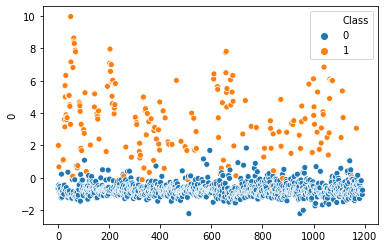

In [107]:
sns.scatterplot(lda_res.index, lda_res[0], hue=df2['Class'])

- 위의 그래프로 알 수 있듯이 1차원으로 축소했음에도 class를 잘 분류하는 것을 알 수 있다.

 LDA 알고리즘은 공분산을 이용하여 클래스 간의 변동성을 가장 설명하는 변환과, 클래스 내의 변동성(분산)을 최소화하는 변환을 찾는 방식으로, 지도학습(Supervised Learning)의 분류에서 사용하기에 좋다고 생각합니다. 현재 문제가 주어진 데이터들을 이용하여 신용카드 사기탐지를 예측하는 분류문제이기 때문에, 가장 적합하다고 생각되어 선택하게 되었습니다.

## 3. 오버 샘플링과 언더 샘플링
### 3-1. 오버 샘플링과 언더 샘플링의 장단점을 비교하고 선택하시오.

오버 샘플링과 언더샘플링은 클래스 불균형을 해소하기 위한 방법들이다.<hr><hr>

오버 샘플링은 빈도가 상대적으로 적은 클래스 데이터를 더 생성하여 불균형을 해소하는 방법이다. 소수 클래스의 샘플을 합성하거나 복제하여 소수 클래스의 데이터 특성이 드러나게 함으로써 정보의 보존효과를 얻을 수 있다는 장점이 있다. 하지만 소수 클래스의 샘플을 과도하게 증가시켰을 때 과적합을 유발시킬 수 있으며, 샘플이 증가함에 따라 학습시 계산 비용이 증가한다는 단점이 있다. <hr><hr>

언더 샘플링은 오버샘플링의 반대 개념으로 다수 클래스의 데이터를 줄여 뷸균형을 해소하는 방법이다. 데이터 셋의 크기가 줄어들기 떄문에 모델 학습이 더 빠르게 진행될 수 있고, 데이터셋의 noise 감소 효과를 얻을 수 있다. 하지만 다수 클래스 샘플을 제거하면서, 중요한 소수 클래스의 정보가 대조군이 되는 다수 클래스의 표본이 사라짐에 따라 정보가 손실될 수 있다는 단점이 있다. <hr><hr>

해당 문제의 데이터상 다수클래스와 소수클래스의 비율이 약 83:17 수준이고, sample의 총 개수가 약 1200개 수준으로 많지 않기 때문에, 언더샘플링을 진행했을 경우 학습데이터가 너무 부족하게 되어 학습이 제대로 되지 않을 수 있다. 따라서 오버 샘플링을 선택한다.

`
df['Class'].value_counts(normalize=True)
0    0.832355
1    0.167645
Name: Class, dtype: float64
`

### 3-2. 분류분석 구현 및 위에서 선택한 샘플링기법 중 2가지 이상의 알고리즘으로 모델을 비교하고 성능을 측정하시오

In [109]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [113]:
from sklearn.model_selection import train_test_split

In [133]:
clf = DecisionTreeClassifier(random_state=2024)

X = df.drop(columns=['Time','Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((954, 18), (239, 18), (954,), (239,))

In [164]:
clf.fit(X_train, y_train)

print("Original RESULT: \n")
print("Train ROC_AUC_SCORE : %.2f"%roc_auc_score(y_train, clf.predict(X_train)))
print("Train F1 Score : %.2f"%f1_score(y_train, clf.predict(X_train)))


print("Test ROC_AUC_SCORE : %.2f"%roc_auc_score(y_test, clf.predict(X_test)))
print("Test F1 Score : %.2f"%f1_score(y_test, clf.predict(X_test)))

Original RESULT: 

Train ROC_AUC_SCORE : 1.00
Train F1 Score : 1.00
Test ROC_AUC_SCORE : 0.96
Test F1 Score : 0.90


In [163]:
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(sampling_strategy='minority', random_state=2024)

X_train_over1, y_train_over1 = ROS.fit_resample(X_train, y_train)
#X_train_over1.shape, y_train_over1.shape ((1588, 18), (1588,))

clf = DecisionTreeClassifier(random_state=2024)
clf.fit(X_train_over1, y_train_over1)

print("Random OverSampling RESULT: \n")

print("Train ROC_AUC_SCORE : %.2f"%roc_auc_score(y_train_over1, clf.predict(X_train_over1)))
print("Train F1 Score : %.2f"%f1_score(y_train_over1, clf.predict(X_train_over1)))


print("Test ROC_AUC_SCORE : %.2f"%roc_auc_score(y_test, clf.predict(X_test)))
print("Test F1 Score : %.2f"%f1_score(y_test, clf.predict(X_test)))

Random OverSampling RESULT: 

Train ROC_AUC_SCORE : 1.00
Train F1 Score : 1.00
Test ROC_AUC_SCORE : 0.95
Test F1 Score : 0.89


In [161]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', random_state=2024)

X_train_over2, y_train_over2 = smote.fit_resample(X_train, y_train)
X_train_over2.shape, y_train_over2.shape  #((1588, 18), (1588,))

clf = DecisionTreeClassifier(random_state=2024)
clf.fit(X_train_over2, y_train_over2)

print("SMOTE RESULT: \n")
print("Train ROC_AUC_SCORE : %.2f"%roc_auc_score(y_train_over2, clf.predict(X_train_over2)))
print("Train F1 Score : %.2f"%f1_score(y_train_over2, clf.predict(X_train_over2)))


print("Test ROC_AUC_SCORE : %.2f"%roc_auc_score(y_test, clf.predict(X_test)))
print("Test F1 Score : %.2f"%f1_score(y_test, clf.predict(X_test)))




SMOTE RESULT: 

Train ROC_AUC_SCORE : 1.00
Train F1 Score : 1.00
Test ROC_AUC_SCORE : 0.92
Test F1 Score : 0.88


In [169]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='minority', random_state=2024)

X_train_over3, y_train_over3 = adasyn.fit_resample(X_train, y_train)
X_train_over3.shape, y_train_over2.shape  #((1592, 18), (1588,))

clf = DecisionTreeClassifier(random_state=2024)
clf.fit(X_train_over3, y_train_over3)

print("ADASYN RESULT: \n")
print("Train ROC_AUC_SCORE : %.2f"%roc_auc_score(y_train_over3, clf.predict(X_train_over3)))
print("Train F1 Score : %.2f"%f1_score(y_train_over3, clf.predict(X_train_over3)))


print("Test ROC_AUC_SCORE : %.2f"%roc_auc_score(y_test, clf.predict(X_test)))
print("Test F1 Score : %.2f"%f1_score(y_test, clf.predict(X_test)))


ADASYN RESULT: 

Train ROC_AUC_SCORE : 1.00
Train F1 Score : 1.00
Test ROC_AUC_SCORE : 0.92
Test F1 Score : 0.85


In [176]:
from imblearn.over_sampling import RandomOverSampler

ROS2 = RandomOverSampler(sampling_strategy=0.4, random_state=2024)

X_train_over4, y_train_over4 = ROS2.fit_resample(X_train, y_train)
X_train_over4.shape, y_train_over4.shape

print("ADASYN RESULT: \n")
print("Train ROC_AUC_SCORE : %.2f"%roc_auc_score(y_train_over4, clf.predict(X_train_over4)))
print("Train F1 Score : %.2f"%f1_score(y_train_over4, clf.predict(X_train_over4)))


print("Test ROC_AUC_SCORE : %.2f"%roc_auc_score(y_test, clf.predict(X_test)))
print("Test F1 Score : %.2f"%f1_score(y_test, clf.predict(X_test)))



ADASYN RESULT: 

Train ROC_AUC_SCORE : 1.00
Train F1 Score : 1.00
Test ROC_AUC_SCORE : 0.92
Test F1 Score : 0.85


### 3-3. 현재까지 전처리한 데이터를 통해 분류 모델 수행 후, 결과를 분석하시오.

Random OverSampling, SMOTE, ADASYN 세 가지 오버샘플링 기법을 사용하여 분류모델 성능을 측정해본 결과, 세 가지 모델중에서는 Random OverSampling 기법이 ROC_AUC_SCORE, F1 Score 모두 가장 좋은 성능을 보여주었다. <hr> <hr>

하지만, 오버샘플링을 수행하지 않을 때 보다 오히려 성능이 떨어졌다. 이러한 사실로 보았을 때, 오히려 오버샘플링을 수행해서 과적합이 발생하여 성능이 떨어졌다고 볼 수 있을 것 같다.

따라서 현재 데이터 셋은 오버샘플링 없이도 좋은 일반화 성능을 낼 수 있다고 볼 수 있다.

## 4. 이상탐지 모델
### 4-1. 이상탐지 모델 2가지 이상 서술하고 기술, 장단점을 설명하시오

1. Local Outlier Factor(LOF)

 - 밀도 기반의 이상치 탐색 방법이다. 주변의 이웃과 밀도 비율을 계산하여 데이터 포인트의 이상치 점수를 산정하여 판별한다.

 - 모든 데이터를 고려하지 않고, 해당 포인트의 주변 데이터만을 이용하여 이상치 탐지를 진행하게 된다.

 - LOF값은 대상 포인트의 밀도를 대상 포인트의 이웃들의 평균 밀도보로 나눈 값으로 일반적으로 LOF 값이 1보다 크다면 이상치로 판단하게 됩니다.

 - LOF는 데이터의 분포나 밀도를 가정하기 않기 때문에 다양한 유형의 데이터에 적용할 수 있다는 장점이 있다.

 - 밀도를 계산하기 위한 연산량이 많아, 데이터의 개수가 많을 경우 시간이 오래걸릴 수 있다는 단점이 있다.

 - KNN 알고리즘과 비슷하게, 이웃 수 값에 의해 결과가 달라질 수 있기 떄문에, 최적의 이웃 수를 찾는 과정이 필요하다.
  
  
2. Isolation Forest

 - 의사 결정 나무와 앙상블 기법을 결합하여 만들어진 이상치 탐지 모델이다.
 
 - 의사결정나무를 지속적으로 분기시키면서, 모든 데이터 관측치의 고립 정도 여부에 따라 이상치를 판단하게 된다.
 
 - 이상치 데이터라면, 의사결정나무의 루트에서 가까운 깊이에서 고립될 것이고, 정상 데이터라면 루트에서 먼 깊이에서 고립될 것이다. 즉, 특정한 샘플이 고립되는 leaf 노드 까지의 거리를 outlier score로 정의하여, root node까지의 거리가 짧을 수록 outlier score가 높아져 이상치로 판단하게 된다
 
 - 앙상블 기법을 응용하여 위의 과정을 통해 만들어진 여러 의사결정나무의 결과를 종합하여 이상치 여부를 판단한다.
 
 - 데이터 분포에 대한 가정이 필요없고, 고차원 데이터에서 거리 기반 모델에 비해 상대적으로 성능이 안정적이다.
 
 - Sample 개수와 나무 개수에 따라 결과가 달라질 수 있기 때문에, 최적 파라미터를 찾는 과정이 필요하다
 
 - 데이터 구조의 특성에 따라 이상치를 잘 판별하지 못하는 경우도 있다.
  https://zephyrus1111.tistory.com/474

### 4-2. 앞서 전처리한 데이터로 한 가지 이상의 탐지 모델을 구현하고 3.에서 만든 모델과 비교하시오

In [178]:
from sklearn.ensemble import IsolationForest

In [206]:
clf = IsolationForest(n_estimators=40, random_state=2024)

clf.fit(X_train, y_train)

res=pd.Series(clf.predict(X_test))
res[res==1] = 0 
res[res==-1] = 1

print("Isolation Forest RESULT \n")
print("Test ROC_AUC_SCORE : %.2f"%roc_auc_score(y_test, res))
print("Test F1 Score : %.2f"%f1_score(y_test, res))


Isolation Forest RESULT 

Test ROC_AUC_SCORE : 0.77
Test F1 Score : 0.70


C:\Users\rkddn\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\rkddn\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Isolation Forest 결과 Decision Tree에 비해 ROC_AUC_SCORE, F1 Score 모두 낮은 성능을 보고있다. 이를 통해, 사기인지 아닌지를 구분하는 것은 Dicision Tree에 비해 성능이 떨어진다는 사실을 알 수 있다.

### 4-3. 데이터분석가 관점에서 3.에서 만든 모델과 4. 에서 만든 모델을 설명하시오

3에서 Decision Tree를 오버샘플링 없이 사용했을 떄 성능이 가장 좋았고, 4의 Isolation Forest에서도 estimator의 개수(tree의 개수)를 낮게 하였을 떄 오히려 성능이 좋아지는 것을 확인할 수 있었다. 이를 통해 현재 데이터셋은 추가적인 처리없이 사기여부를 판단할 수 있는 상태이며, 오히려 전처리 및 파라미터 튜닝을 했을 때 과적합이 발생하여 일반화 성능이 떨어진다는 것을 알 수 있다. 다만, 이상치 탐지를 통해 사기여부를 예측하는 것 대신, 따로 모니터링 대상으로는 활용해 볼 수 있을 것 같다.

#     ■통계분석(50점)

## 1. 2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오(반올림하여 소수점 아래 둘째자리까지 표기).

In [232]:
from scipy.stats import gmean

arr=np.array([100000,150000,250000])
arr_percent = []
arr_percent.append(arr[1]/arr[0])
arr_percent.append(arr[2]/arr[1])

res = gmean(arr_percent) * 100
np.round(res,2)

158.11

##  2. 12건의 광고시간을 측정한 데이터에서, 평균은 15.5초, 분산은 3.2초였다. 이때 광고시간의 90% 신뢰구간을 구하시오.

In [271]:
n = 12
dof = n-1
mean = 15.5
var = 3.2
std = var**0.5

dof, std

(11, 1.7888543819998317)

In [250]:
from scipy.stats import t

In [279]:
a = t(dof).ppf(0.95)
a

1.7958848187036691

In [280]:
lower = mean - (a * std / (n**0.5))
upper = mean + (a * std / (n**0.5))

In [281]:
(lower,upper)

(14.572609067393861, 16.427390932606137)

In [288]:
##답이 틀린 것 같은데? 확인 필요
display(t.interval(alpha=0.9, loc=15.5, scale=std, df=dof))

##scale에 표준오차가 들어가야함 
t.interval(alpha=0.9, loc=15.5, scale=std/n**0.5, df=dof)

(12.287423572494966, 18.71257642750503)

(14.572609067393861, 16.427390932606137)

## 3. 강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 유의수준 0.1하에 검정하시오(단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있음. 정규성을 만족한다고 가정) 

### 3-1. 귀무가설과 대립가설을 세우시오

귀무가설(H0): 강의 상류와 하류의 생물 다양성 점수에 차이가 없다.

대립가설(H0): 강의 상류와 하류의 생물 다양성 점수에 차이가 있다.

### 3-2. 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오

In [289]:
df = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem7.csv")
df

,river,up,down
0,a,57.1,45.7
1,b,51.6,37.2
2,c,53.9,53.3
3,d,59.0,54.3
4,e,57.5,46.3


In [290]:
from scipy.stats import ttest_rel

In [295]:
stat, p = ttest_rel(df['up'],df['down'])
stat, p ##검정통계량, 유의확률

(3.3526056764717995, 0.028499777234053288)

유의확률(p value)가 유의수준보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다

## 4. user_counts를 종속변수로 하는 데이터이다

### 4-1. 분위수 회귀분석(Quantile Regression)을 사용하여 회귀계수를 구하시오(반올림하여 소수점 아래 둘째자리까지 표기)

In [296]:
df_user= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem8.csv")
df_user

,temperature,wind,precipitation,user_counts
0,10.400000,4.600000,0.844944,6368
1,5.666667,4.625000,0.040860,5902
2,4.933333,4.725000,0.008696,6226
3,3.400000,2.675000,0.156989,5829
4,8.900000,3.950000,7.988462,7589
...,...,...,...,...
2092,3.500000,2.100000,0.024096,5430
2093,8.233333,2.000000,16.843820,2125
2094,9.500000,3.666667,11.550575,6008
2095,4.800000,1.200000,0.104651,4929


In [297]:
from statsmodels.formula.api import quantreg

In [302]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Sat, 13 Jul 2024   No. Observations:                 2097
Time:                        17:14:26   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""

In [319]:
model = quantreg('user_counts ~ temperature + wind + precipitation',data=df_user).fit()

res = model.params.values

res = np.round(res,2)
res

array([5941.84,  268.89, -129.41,  -83.38])

### 4-2. (1)의 회귀계수를 활용하여 temperature 10.5, wind 8.2, precipitation 3.5일 때 user_counts를 예측하시오(반올림하여 소수점 아래 둘째자리까지 표기)

In [325]:
input = pd.DataFrame([10.5,8.2,3.5]).T.rename(columns={0:'temperature', 1:'wind',2:'precipitation'})
input

res = np.round(model.predict(input),2)
res.values[0]

7412.24

* sklearn QuantileRegressor랑 다른지 확인해보기

## 5. 지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인하시오

## 5-1. 귀무가설과 대립가설을 설정하시오

H0(귀무가설): 지하철 호선과 월별, 승객 수 간 상관관계가 없다.
  
H1(대립가설): 지하철 호선과 월별, 승객 수 간 상관관계가 있다.

### 5-2. Type III Anova를 사용하여 상관관계가 있는지 검정하시오

In [328]:
df = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem9.csv")
df

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301
...,...,...,...
67,3,8,1365
68,3,9,1374
69,3,10,1337
70,3,11,1332


In [341]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [342]:
formula = 'total ~ C(line) + C(month) + C(line):C(month)'
formula

model= ols(formula, data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(line),2.0,2.147444e+06,1.073722e+06,10362.998525,2.007247e-50
C(month),11.0,3.206533e+04,2.915030e+03,28.134341,2.103496e-14
C(line):C(month),22.0,9.696908e+04,4.407686e+03,42.540665,1.582232e-19
Residual,36.0,3.730000e+03,1.036111e+02,NaN,NaN


상호작용의 p value가 0.1보다 작기때문에 귀무가설을 기각하고 대립가설을 채택한다

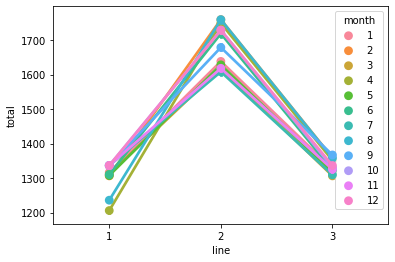

In [346]:
sns.pointplot(x='line', y='total', hue='month',data=df)

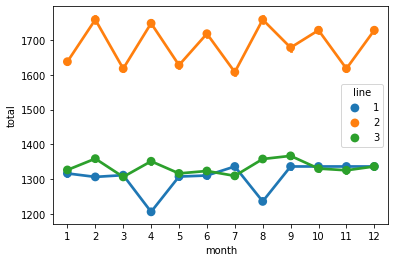

In [347]:
sns.pointplot(x='month', y='total', hue='line',data=df)

Out[347] 그래프에서 보이듯이 호선과 월이 서로 영향을 줌(교차함)


### 주효과 검정 / 상호작용 검정
https://quickdata.tistory.com/11


이원분산분석(Two way Anova)은 두 개의 독립변수에 따라 집단 간 종속변수의 평균 차이를 비교 검정 하는 방법입니다.


이원 분산분석 결과는 처치효과로 주효과와 상호작용효과를 보여주고, 두 개의 독립변수 간 관계에 따라 두 가지로 구분합니다.

*주효과는 독립변수들이 각각 독립적으로 종속변수에 미치는 영향을 검정하는 것인데, 즉 한 처치변수의 변화가 결과변수에 미치는 영향을 말합니다.

*상호작용효과는 독립변수들이 서로 연관되어 종속변수에 미치는 영향을 검정하는 것인데, 즉 다른 처치변수의 변화에 따라 한 처치변수가 결과변수에 미치는 영향에 관한 것입니다.

### Type별 ANOVA 설명

https://ysyblog.tistory.com/176